## Decision Tree

________

- This is one of the methods of classification in ML - a simple one
- Why Decision Tree? Why not only Logistic or Linear Regression?
    - because Linear models have one significant disadvantage - their linearity in regression required
- Non-linearity is not a problem for Decision Trees (and other ML methods)
- Cons - this is one of the most overfitting model

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### The goal is to learn how to predict variable 'Y' based on the values of 'X_1' and 'X_2' (X_1,...,X_n) using Decision Tree method

In [2]:
# assume we have a dataset with 2 variables 'X_1' and 'X_2' and 1 target (dependent) variable 'Y'
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 
                     'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 
                     'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

data.head()

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0


In [3]:
# first we define a Classifier (we choose the tree classifier model here)
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

# save features into 'X' (based on them we train a tree)
X = data[['X_1', 'X_2']]

# save target variable into 'y'
y = data.Y

# Train our decision tree
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

#### Now we have trained model 'clf' and we can predict target on a test dataset if we need to.

### Practice 1

Train a Decision Tree based on train data of iris dataset. 

Predict the types of species from a test data of iris

In [4]:
df = pd.read_csv('data/train_iris.csv')
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [5]:
# separate 'features' and 'target'
X_train = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_train = df.species

In [6]:
# load our test data where we'll predict species
test_df = pd.read_csv('data/test_iris.csv')

In [7]:
# separate 'features' and 'target' values in the test data as well
X_test = test_df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_test = test_df.species

#### Let's play with one of the parameters of the model - ***max_depth***

This parameter limits the maximum height of the tree (number of levels)

In [8]:
# define a range of values we try in max_depth parameter
max_depth_values = range(1, 100)

In [9]:
# create a Data Frame to store the 'score' values
scores_data = pd.DataFrame()

In [10]:
# for each value of 'max_depth' we calculate scores on both 'train' and 'test' datasets and save it in 'scores_data'
np.random.seed(0)
for max_depth in max_depth_values:
    my_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    my_tree.fit(X_train, y_train) # Capture patterns from provided data
    train_score = my_tree.score(X_train, y_train)
    test_score = my_tree.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
#    scores_data = scores_data.append(temp_score_data)
    scores_data = pd.concat([scores_data, temp_score_data])

In [11]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [12]:
# melting our dataset
# here we combine 'train_score' and 'test_score' values in one column
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], 
                          var_name='set_type', value_name='score')

In [13]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


#### Let's find the precision scores - our metric

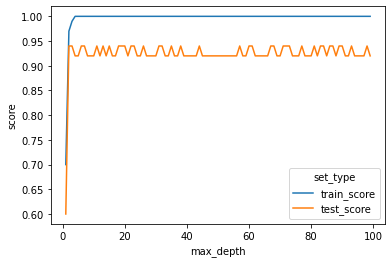

In [14]:
p = sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

#### Idea is to find that 'max_depth' value, so that both 'train_score' and 'test_score' are in their maximum

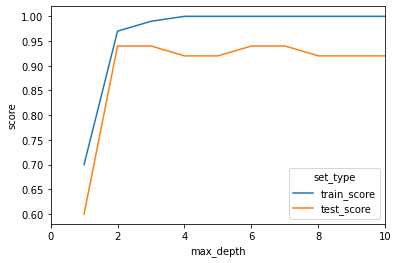

In [15]:
# according to the plot above we see that first maximum is somewhere between 0 and 10
p.set(xlim= (0, 10))
p.figure

#### So, the first 'max_depth' value where 'train_score' and 'test_score' are maximum is 6

Let's prove it

In [16]:
scores_data.sort_values(['test_score', 'train_score'], ascending=False).max_depth.iloc[0]

6

### Practice 2

Based on the 'train' dataset predict the number of 'dogs' and 'cats' in the 'test' dataset.

In [17]:
# load 'train dataset
train = pd.read_csv('data/dogs_and_cats.csv', index_col=0)
train.head()

,Length,Height,Woolly,Barks,Climbs on trees,Species
0,15,18.0,1,1,0,dog
1,20,24.0,1,0,0,dog
2,34,40.8,1,1,0,dog
3,26,31.2,1,1,0,dog
4,16,19.2,1,1,0,dog


In [18]:
# save features for the Tree training into 'X'
X = train.drop('Species', axis = 1)

In [19]:
# save train target to 'y'
y = train['Species']

In [20]:
# Train the tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X, y)

DecisionTreeClassifier()

In [21]:
# Training result
dec_tree.score(X, y)

1.0

In [22]:
# load test dataset
test = pd.read_json('data/test_dogs_cats.txt')
test.head()

,Length,Height,Woolly,Barks,Climbs on trees
0,26,31.2,1,1,0
1,33,39.6,1,1,0
2,29,34.8,1,1,0
3,33,39.6,1,1,0
4,18,21.6,1,1,0


In [23]:
# predict the result
y_predict = dec_tree.predict(test)

In [24]:
# Count the number of dogs and cats in the result
pd.Series(y_predict).value_counts()

cat    56
dog    44
dtype: int64

__________
## Accuracy metrics

#### Precision and Recall:

$$Precision = \frac{TP}{TP+FP}$$
<br>
$$Recall = \frac{TP}{TP+FN}$$

__where:__
 - TP - True positive
 - FP - False positive
 - FN - False negative

#### F-measure

__- harmonic mean of Precision and Recall__

$$F = \frac{2*Precision*Recall}{Precision+Recall}$$

#### ROC-curve

A curve on a True Positive Rate and False Positive Rate plot

_________
### How to improve the model?
### How to minimize overfitting the model?

***GridSearchCV()*** - finds the best model based on the given parameters with a ***crossvalidation***

In [25]:
# key module for training models.
# it takes a model, parameteres that can be tuned 
# and using cross-validation it finds a combination of parameters,
# that gives the best result (result can be also defined by different metrics)

from sklearn.model_selection import GridSearchCV

# empty tree that will be used as an estimator in GridSearchCV
clf = tree.DecisionTreeClassifier()

# parameters that will be used in GridSearchCV
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

# GridSearchCV takes the model (tree here), 
# parameters and cross-validation settings (number of k-Folds)
grid_search_cv_clf = GridSearchCV(clf, params, cv=5)

# run a training on train data with cv
grid_search_cv_clf.fit(X_train, y_train)

# finding parameters that result best accuracy
grid_search_cv_clf.best_params_

# save best classifier
best_clf = grid_search_cv_clf.best_estimator_

# accuracy on test data
print(best_clf.score(X_test, y_test))

# prediction on test data
y_pred = best_clf.predict(X_test)

# find precision and recall
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test, y_pred, average = 'macro'))
print(recall_score(y_test, y_pred, average = 'macro'))

# probability of assigning to classes
y_pred_prob = best_clf.predict_proba(X_test)

0.94
0.9407894736842105
0.9444444444444443


### Practice 3


In [26]:
df_train = pd.read_csv('data/train_data_tree.csv')
df_train.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [27]:
X = df_train.drop('num', axis=1)
y = df_train.num

clf = tree.DecisionTreeClassifier(criterion='entropy')

clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [28]:
clf.score(X, y)

0.7016806722689075

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

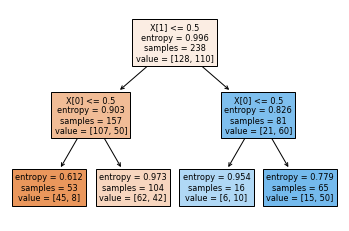

In [29]:
tree.plot_tree(clf, filled=True)

In [30]:
# Calculate Information Gain in the root tree
# IG = E - (n_1*E_1 + n_2*E_2)/(n_1+n_2)

0.996 - (157*.903+81*0.826)/(157+81)

0.11920588235294105

### Practice with iris

#### To begin with, let's test our tree on the classic iris set, which contains data on the length, width of the sepals and petals of irises and their belonging to the species. It is already built into sklearn, which is quite convenient.


So, we are given 2 numpy arrays with measured features of irises and their belonging to a species. First, let's try a primitive method with splitting the data into 2 datasets. We'll use the ***train_test_split*** function to split the available data into training and test datasets, 75% and 25% respectively.

Then we create a 'dt' tree with default parameters and train it on the training data. Then, we predict the classes to which the data from the test set belongs and store the result of the predictions in the predicted variable.

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# load iris data from sklearn
iris = load_iris()

# divide iris to data and target values
X = iris.data
y = iris.target

# split the data 25%/75% for train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create and train the tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict target
predicted = dt.predict(X_test)

#### One tree is good, but where is the guarantee that it is the best, or even close to it? One of the ways to find a more or less optimal set of tree parameters is to search through the set of trees with different parameters and choose the appropriate one.

For this purpose, there is the ***GridSearchCV*** class, which iterates over each of the combinations of parameters among those specified for the model, trains it on data and conducts cross-validation. After that, the model with the best parameters is stored in the ***.best_estimator_*** attribute.

This applies not only to trees, but also to other ***sklearn*** models.

Now the task is to iterate through all the trees on the iris data according to the following parameters:
- maximum depth - from 1 to 10 levels
- minimum number of samples for separation - from 2 to 10
- minimum number of samples per sheet - from 1 to 10

We'll store the best tree in the 'best_tree' variable.

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

# define a tree classifier
clf = DecisionTreeClassifier()

# different ranges of parameters to find the best
params = {'max_depth': range(1,10), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1,10)}

# model with the all the params
search = GridSearchCV(clf, params, cv=5)

# train model with parameters
search.fit(X, y)

# find the best tree with all the best parameters
best_tree = search.best_estimator_
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [33]:
# Another way to find good parameters (not ideal but fast)
search2 = RandomizedSearchCV(clf, params, cv=5)

search2.fit(X, y)

best_tree2 = search2.best_estimator_

In [34]:
best_tree2

DecisionTreeClassifier(max_depth=3, min_samples_split=4)

### Practice 5

We are given 2 datasets:
- *train* - dataset with correct target answers (stored in column 'y')
- *test* - dataset where we need to predict target

We need to find a tree with the best parameters using ***GridSearchCV*** and predict the answers in the second dataset.

*Ranges of parameters:*

- max depth - from 1 to 10 levels
- min sample split - from 2 to 10
- min sample leaf - from 1 to 10 

We will name the variables in the following way:
- best tree - *best_tree*
- GridSearchCV - *search*
- predictions - *predictions*

In [35]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('data/train_iris.csv')
test = pd.read_csv('data/test_iris.csv')

clf = DecisionTreeClassifier()
params = {'max_depth': range(1,11), 
          'min_samples_split': range(2,11), 
          'min_samples_leaf': range(1,11)}
search = GridSearchCV(clf, params, cv=5)

X = train.drop(train.columns[[0, -1]], axis=1)
y = train.iloc[:, [-1]]
test = test.drop(test.columns[[0, -1]], axis=1)

# train model
search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [36]:
best_tree = search.best_estimator_
y_pred = best_tree.predict(X)

print(f'Accuracy score of the best model on train data is {best_tree.score(X,y)}')
print(f'Precision score: {precision_score(y, y_pred, average = "macro")}')
print(f'Recall score: {recall_score(y, y_pred, average = "macro")}')
print(f'\nOur predictions on test data: \n {best_tree.predict(test)}')

Accuracy score of the best model on train data is 0.99
Precision score: 0.9907407407407408
Recall score: 0.9888888888888889

Our predictions on test data: 
 [2 2 2 1 0 2 0 2 0 1 1 1 2 0 0 2 1 0 0 1 1 2 0 0 1 0 0 2 0 0 1 1 1 1 2 1 2
 1 2 2 0 1 2 1 1 2 1 2 0 1]


#### When classifying, the model can make mistakes by assigning the wrong class to an observation. There are various metrics for evaluating the quality of predictions, which are based on 4 parameters - true positive, false positive, false negative and true negative, corresponding to which class was assigned to the observations of each of the classes. A matrix of 4 (in the case of binary classification) of these parameters is called the ***confusion matrix***.

In sklearn, we can conveniently get it using the ***confusion_matrix*** function. 

We have 2 arrays with true and predicted observation classes - y and predictions. Now we can get the confusion matrix from them and put it in the 'conf_matrix' variable.

In [37]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, y_pred)

print(conf_matrix)

[[35  0  0]
 [ 0 29  1]
 [ 0  0 35]]
